<a href="https://colab.research.google.com/github/Lucy-Moctezuma/Machine-Learning-Projects-for-SFSU/blob/main/E.%20Coli%20Machine%20Learning%20Project/6_Making_Final_Metrics_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating Graphs for Accuracies, Recall and Precision Scores**

In this Notebook we will create a graph that will let us show the Accuracy,  Recall and Precision Scores for both Resistant (R) and Susceptibility (S). The figures we will create are inspired by the paper where our dataset comes from:

**Moradigaravand D, Palm M, Farewell A, Mustonen V, Warringer J, Parts L (2018) Prediction of antibiotic resistance in Escherichia coli from large-scale pan-genome data. PLoS Comput Biol 14(12): e1006258. https://doi.org/10.1371/journal.pcbi.1006258**

Below is the figure the author of the paper created:

![Moradigaravand graph](https://drive.google.com/uc?export=view&id=11aByLgM7pVPfBfhVU2LNBW2ZbZGbSgJH)

We will be creating a similar ones except instead of F1-scores we will focus on the **Recall** and **Precision** scores for each (Resistance and Susceptibility). In addition, our dataset includes an antibiotic drug that was not included in their original publication ("TZP").


### **1) Importing packages needed for visualization**

Below we will only be importing libraries needed for visualization of the results from all our models.

In [ ]:
# Data Wrangling Imports
import pandas as pd
import numpy as np

# Data visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch

# File Manipulation Imports
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **2) Loading each models scores and join them into a single dictionary**

Below we will import the 4 csv files created from Notebooks 2 to 5, where the metrics (Accuracy, Resistant Recall, Susceptibility Recall, Resistant Precision and Susceptibility Precision) from every combination of features (S, G, SY, GY, GS and GYS) were stored. Then we will store it in a dictionary to access later on.

In [ ]:
# Loading all models metrics and joint them in a dictionary:
filepath = "/content/drive/MyDrive/EColi_ML_CSV_files/"
Model_Scores = {}

# Loading all data frames
LG_metrics = pd.read_csv(filepath+"LG_metrics_df.csv")
RF_metrics = pd.read_csv(filepath+"RF_metrics_df.csv")
GB_metrics = pd.read_csv(filepath+"GB_metrics_df.csv")
DL_metrics = pd.read_csv(filepath+"DL_metrics_df.csv")

# Adding all dataframes to dictionary
Model_Scores["Logistic_Regression"] = LG_metrics
Model_Scores["Random_Forest"] = RF_metrics
Model_Scores["Gradient_Boosted_Trees"] = GB_metrics
Model_Scores["Deep_Learning"] = DL_metrics

Below is an example of how we can access a particular dataframe within our Python dictionary:

In [ ]:
# showing example of how a single dataframe can be accessed
Model_Scores['Gradient_Boosted_Trees'].head()

,Drug_combo,Accuracy,R_recall,S_recall,R_precision,S_precision
0,CTZ_G,0.949922,0.727273,0.985481,0.888889,0.957672
1,CTZ_S,0.899844,0.488636,0.965517,0.693548,0.922010
2,CTZ_GY,0.953052,0.738636,0.987296,0.902778,0.959436
3,CTZ_SY,0.907668,0.534091,0.967332,0.723077,0.928571
4,CTZ_GS,0.948357,0.738636,0.981851,0.866667,0.959220


### **3) Select only the best scores for each drug from each model**

Below we will be creating a function that helps us extract the best metrics, we can choose to extract either Recall or Precision. By default we will work with Recall first as part of an example.

In [ ]:
# Extracting list of combos from dictionary created
combo_list = list(Model_Scores['Gradient_Boosted_Trees']["Drug_combo"].str.split("_", expand= True)[1].unique())
combo_list

['G', 'S', 'GY', 'SY', 'GS', 'GYS']

In [ ]:
# Extracting list of drugs from dictionary created
drug_list = list(Model_Scores['Gradient_Boosted_Trees']["Drug_combo"].str[:3].unique())
drug_list

['CTZ',
 'CTX',
 'AMP',
 'AMX',
 'AMC',
 'TZP',
 'CXM',
 'CET',
 'GEN',
 'TBM',
 'TMP',
 'CIP']

In [ ]:
# creating function that will take the best scores from each model
def Best_metrics(model,df):
  print("Selecting Best Scores for model: ",model)
  bestcores_dic = {}
  for drug in drug_list:
    data = df.loc[df["Drug_combo"].str.startswith(drug)]
    max_acc = max(data["Accuracy"])
    drug_combo = data["Drug_combo"][data["Accuracy"] == max_acc].unique()[0]
    R_rec = float(data[data["Drug_combo"] == drug_combo]["R_recall"])
    S_rec = float(data[data["Drug_combo"] == drug_combo]["S_recall"])
    R_prec = float(data[data["Drug_combo"] == drug_combo]["R_precision"])
    S_prec = float(data[data["Drug_combo"] == drug_combo]["S_precision"])
    bestcores_dic[drug_combo] = [max_acc, R_rec, S_rec, R_prec, S_prec]
    bestscores_df = pd.DataFrame.from_dict(bestcores_dic, orient ='index',columns=["Accuracy", "R_recall", "S_recall", "R_precision", "S_precision"]).reset_index()
    bestscores_df = bestscores_df.rename(columns = {'index':'Drug_combo'})
  return bestscores_df

Below we will implement this function to extract the best Accuracy and other metrics from our Logistic Regression Results.

In [ ]:
# Implementation of function Best_metrics() example with Logistic Regression scores
LG_best_metrics = Best_metrics("Logistic_Regression", Model_Scores["Logistic_Regression"])
LG_best_metrics

Selecting Best Scores for model:  Logistic_Regression


<ipython-input-6-a42da23e73a4>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R_rec = float(data[data["Drug_combo"] == drug_combo]["R_recall"])
<ipython-input-6-a42da23e73a4>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_rec = float(data[data["Drug_combo"] == drug_combo]["S_recall"])
<ipython-input-6-a42da23e73a4>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R_prec = float(data[data["Drug_combo"] == drug_combo]["R_precision"])
<ipython-input-6-a42da23e73a4>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_prec = float(data[data["Drug_combo"] == drug_combo]["S_precision"])
<ipython-

,Drug_combo,Accuracy,R_recall,S_recall,R_precision,S_precision
0,CTZ_GY,0.945227,0.727273,0.980036,0.853333,0.957447
1,CTX_G,0.959283,0.857143,0.985656,0.939130,0.963928
2,AMP_G,0.834532,0.875000,0.714286,0.900990,0.657895
3,AMX_G,0.861878,0.876712,0.839161,0.893023,0.816327
4,AMC_G,0.771171,0.597633,0.847150,0.631250,0.827848
5,TZP_G,0.902527,0.121212,0.952015,0.137931,0.944762
6,CXM_GY,0.849765,0.726744,0.895075,0.718391,0.898925
7,CET_GY,0.870504,0.780702,0.932927,0.890000,0.859551
8,GEN_G,0.945227,0.776596,0.974312,0.839080,0.961957
9,TBM_G,0.881295,0.753086,0.934010,0.824324,0.901961


### **4) Converting combo strings into separate columns of G, Y and S**

The function below will help us code what feature datasets were used. This information will now appear as 3 columns, one per dataset feature (G, Y and S). These columns will help us create the black and white checkered grids we see at the bottom of the example figure from Moradigaravand's paper.


In [ ]:
# Creating a function that takes the combo strings from Drug_combo column and turns them into separate columns
def make_GYS(bestscores_df):
  # Create 3 new columns one for each type of features (Gene presence, Year and Population structure)
  bestscores_df["G"] = " "
  bestscores_df["Y"] = " "
  bestscores_df["S"] = " "

  # Read the combo part of Drug_combo
  split_c = bestscores_df["Drug_combo"].str.split("_", expand=True)
  i=0
  while i < len(split_c[1]):
    split_each_c = [x for x in split_c[1][i]]
    for g in split_each_c:
      if "G" in split_each_c:
        bestscores_df.at[i,"G"] = 1
      else:
        bestscores_df.at[i,"G"] = 0
    for y in split_each_c:
      if "Y" in split_each_c:
        bestscores_df.at[i,"Y"] = 1
      else:
        bestscores_df.at[i,"Y"] = 0
    for s in split_each_c:
      if "S" in split_each_c:
        bestscores_df.at[i,"S"] = 1
      else:
        bestscores_df.at[i,"S"] = 0
    i += 1
  bestscores_df["Drug_combo"] = bestscores_df["Drug_combo"].map(lambda x: x.rstrip('_GYS'))
  bestscores_df.rename(columns={"Drug_combo": "Drug"}, inplace = True)

  return bestscores_df

Below in the implementation we can see our three columns appear, one for each type of feature. 1 indicates that a feature was used and 0 that it wasn't used. Below we see an example of these columns for our Logistic Regression model results.

In [ ]:
# Implementing function make_GYS()
GYS_LG_best_metrics = make_GYS(LG_best_metrics)
GYS_LG_best_metrics

,Drug,Accuracy,R_recall,S_recall,R_precision,S_precision,G,Y,S
0,CTZ,0.945227,0.727273,0.980036,0.853333,0.957447,1,1,0
1,CTX,0.959283,0.857143,0.985656,0.939130,0.963928,1,0,0
2,AMP,0.834532,0.875000,0.714286,0.900990,0.657895,1,0,0
3,AMX,0.861878,0.876712,0.839161,0.893023,0.816327,1,0,0
4,AMC,0.771171,0.597633,0.847150,0.631250,0.827848,1,0,0
5,TZP,0.902527,0.121212,0.952015,0.137931,0.944762,1,0,0
6,CXM,0.849765,0.726744,0.895075,0.718391,0.898925,1,1,0
7,CET,0.870504,0.780702,0.932927,0.890000,0.859551,1,1,0
8,GEN,0.945227,0.776596,0.974312,0.839080,0.961957,1,0,0
9,TBM,0.881295,0.753086,0.934010,0.824324,0.901961,1,0,0


### **5) Extracting best metrics and coding GYS into columns for all models**

Below we will be implementing the two functions we have created before: **Best_metrics()** and **make_GYS()** for all the results from each of the models.

In [ ]:
# Getting the best metrics for all the models
Best_metrics_models = {}
for model, df in Model_Scores.items():
  # select the best scores obtained from each model
  Model_best_metrics = Best_metrics(model, df)

  # Code GYS data in 0 "for absence" and 1 "for presence" into 3 columns
  GYS_coded_best = make_GYS(Model_best_metrics)
  print(GYS_coded_best)

  # Save new dataframe in a dictionary with best metrics selected
  Best_metrics_models[model] = GYS_coded_best

Selecting Best Scores for model:  Logistic_Regression
   Drug  Accuracy  R_recall  S_recall  R_precision  S_precision  G  Y  S
0   CTZ  0.945227  0.727273  0.980036     0.853333     0.957447  1  1  0
1   CTX  0.959283  0.857143  0.985656     0.939130     0.963928  1  0  0
2   AMP  0.834532  0.875000  0.714286     0.900990     0.657895  1  0  0
3   AMX  0.861878  0.876712  0.839161     0.893023     0.816327  1  0  0
4   AMC  0.771171  0.597633  0.847150     0.631250     0.827848  1  0  0
5   TZP  0.902527  0.121212  0.952015     0.137931     0.944762  1  0  0
6   CXM  0.849765  0.726744  0.895075     0.718391     0.898925  1  1  0
7   CET  0.870504  0.780702  0.932927     0.890000     0.859551  1  1  0
8   GEN  0.945227  0.776596  0.974312     0.839080     0.961957  1  0  0
9   TBM  0.881295  0.753086  0.934010     0.824324     0.901961  1  0  0
10  TMP  0.895683  0.872881  0.912500     0.880342     0.906832  1  0  0
11  CIP  0.934272  0.873239  0.951710     0.837838     0.963340  1  0 

<ipython-input-6-a42da23e73a4>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R_rec = float(data[data["Drug_combo"] == drug_combo]["R_recall"])
<ipython-input-6-a42da23e73a4>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_rec = float(data[data["Drug_combo"] == drug_combo]["S_recall"])
<ipython-input-6-a42da23e73a4>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R_prec = float(data[data["Drug_combo"] == drug_combo]["R_precision"])
<ipython-input-6-a42da23e73a4>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_prec = float(data[data["Drug_combo"] == drug_combo]["S_precision"])
<ipython-

   Drug  Accuracy  R_recall  S_recall  R_precision  S_precision  G  Y  S
0   CTZ  0.953052  0.738636  0.987296     0.902778     0.959436  1  1  0
1   CTX  0.980456  0.912698  0.997951     0.991379     0.977912  1  1  0
2   AMP  0.924460  0.971154  0.785714     0.930876     0.901639  1  0  1
3   AMX  0.897790  0.899543  0.895105     0.929245     0.853333  1  1  1
4   AMC  0.814414  0.579882  0.917098     0.753846     0.832941  1  1  0
5   TZP  0.944043  0.090909  0.998081     0.750000     0.945455  1  0  1
6   CXM  0.890454  0.697674  0.961456     0.869565     0.896208  1  0  0
7   CET  0.910072  0.815789  0.975610     0.958763     0.883978  1  1  1
8   GEN  0.971831  0.829787  0.996330     0.975000     0.971377  1  0  0
9   TBM  0.899281  0.753086  0.959391     0.884058     0.904306  1  0  0
10  TMP  0.924460  0.906780  0.937500     0.914530     0.931677  1  1  0
11  CIP  0.948357  0.845070  0.977867     0.916031     0.956693  1  0  0
Selecting Best Scores for model:  Deep_Learning
   

<ipython-input-6-a42da23e73a4>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R_rec = float(data[data["Drug_combo"] == drug_combo]["R_recall"])
<ipython-input-6-a42da23e73a4>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_rec = float(data[data["Drug_combo"] == drug_combo]["S_recall"])
<ipython-input-6-a42da23e73a4>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R_prec = float(data[data["Drug_combo"] == drug_combo]["R_precision"])
<ipython-input-6-a42da23e73a4>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_prec = float(data[data["Drug_combo"] == drug_combo]["S_precision"])
<ipython-

### **6) Creating a function to plot bar charts for each metric**

The function below will help us plot barplots comparing the metrics we choose for all the models created.

In [ ]:
def barplot(metric_col, subplot_axis, label_show = True):
  for model, df in Best_metrics_models.items():
    X_axis = np.arange(len(drug_list))
    X_labels = drug_list

    Y_axis = np.arange(0,1.2,0.2)

    subplot_axis.set_ylabel(metric_col, fontsize = 14)
    subplot_axis.set_ylim(bottom=0, top=1)

    subplot_axis.set_xticklabels(X_labels, fontsize = 15)
    subplot_axis.set_xticks(X_axis)
    subplot_axis.margins(x=0)

    if label_show == False:
      subplot_axis.tick_params(left = True, right = False , labelleft = True , labelbottom = False, bottom = True)

    if model == "Logistic_Regression":
      X_axis = X_axis - 0.3
      color = "plum"
      label = "LG"
      subplot_axis.bar(X_axis, list(df[metric_col]), width =.2, align = 'center', color = color, label = label, edgecolor="gray")
    elif model == "Random_Forest":
      X_axis = X_axis - 0.1
      color = "cadetblue"
      label = "RF"
      subplot_axis.bar(X_axis, list(df[metric_col]), width =.2, align = 'center', color = color, label = label, edgecolor="gray")
    elif model == "Gradient_Boosted_Trees":
      X_axis = X_axis + 0.1
      color = "goldenrod"
      label = "GB"
      subplot_axis.bar(X_axis, list(df[metric_col]), width =.2, align = 'center', color = color, label = label, edgecolor="gray")
    elif model == "Deep_Learning":
      X_axis = X_axis + 0.3
      color = "steelblue"
      label = "GB"
      subplot_axis.bar(X_axis, list(df[metric_col]), width =.2, align = 'center', color = color, label = label, edgecolor="gray")
  return

Below we have the implementation of this function on the **Accuracy** metric. However we can choose other ones available as well. In this case we could choose **R_recall**, **S_precision**, etc.

<ipython-input-11-4198cd7a9956>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot_axis.set_xticklabels(X_labels, fontsize = 15)


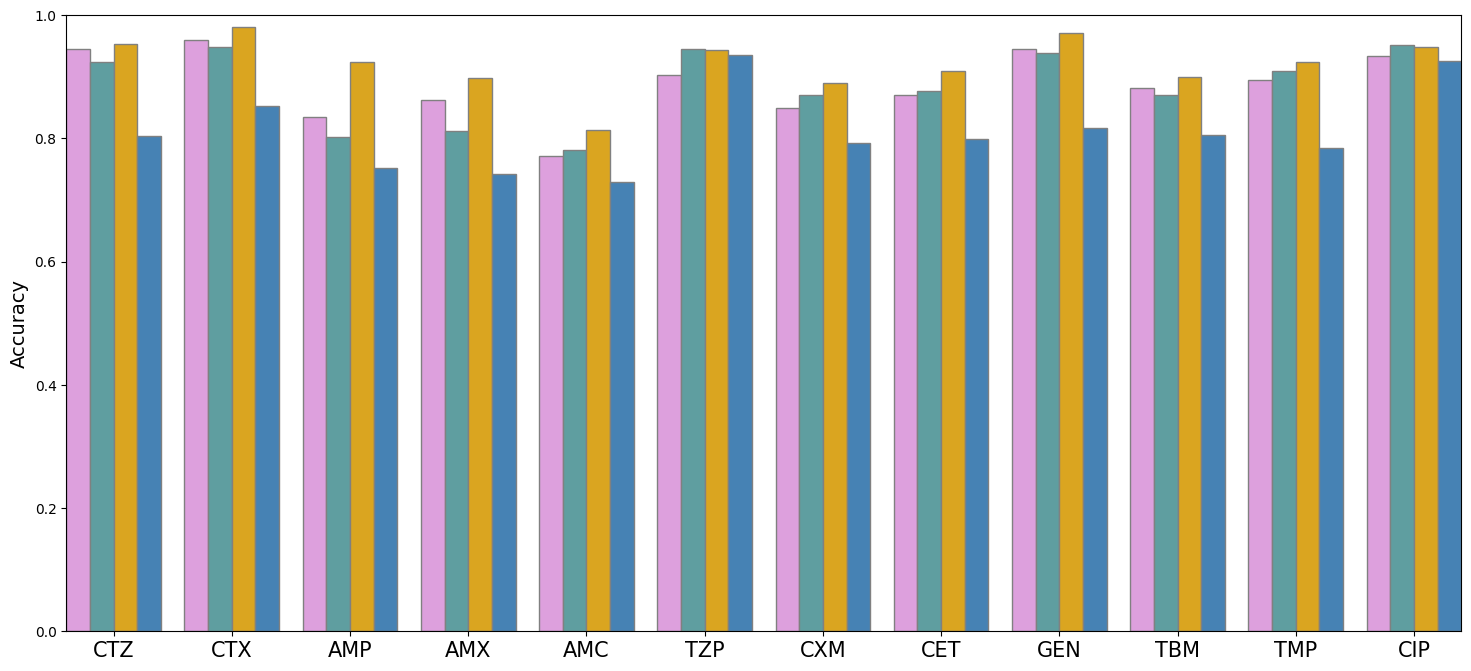

In [ ]:
# implementing function barplot() for one metric "Accuracy"
figure, subs = plt.subplots(1, 1,figsize = (18,8))
acc_plot = barplot("Accuracy",subs,label_show=True)

### **7) Creating a function to plot GYS grids for each drug**

The function below will create a small graphic that will indicate what dataset was used (G, Y, and/or S) when training the model. This is made using the columns created before when we implemented the **make_GYS()** function.

In [ ]:
# function that creates a graph for each of the drugs
def GYS_gridplot(drug,subplot_axis, label_show = True, title_pos = -0.2):
  # Create 3 new lists one for each type of features (Year, Population structure and Gene presence)
  Y_list = [] # storing whether it used or not year data
  S_list = [] # storing whether it used or not population structure data
  G_list = [] # storing whether it used or not accessory gene data

  # Fill up corresponding lists from drug results from each model
  for model, df in Best_metrics_models.items():
    for drug_name in df["Drug"]:
      if drug_name == drug:
        Y_list.append(int(df["Y"][df["Drug"]==drug]))
        S_list.append(int(df["S"][df["Drug"]==drug]))
        G_list.append(int(df["G"][df["Drug"]==drug]))

  Drug_GYS_list = [Y_list, S_list, G_list]

  plt.yticks(np.arange(3), ["Year", "Structure", "Accessory Genes"])
  if label_show == False:
      subplot_axis.tick_params(left = False, labelleft = False)

  orig_map = plt.cm.get_cmap('gray')
  reversed_map = orig_map.reversed()
  subplot_axis.imshow(Drug_GYS_list, cmap = reversed_map)

  subplot_axis.axvline(x=0.5)
  subplot_axis.axvline(x=1.5)
  subplot_axis.axvline(x=2.5)
  subplot_axis.axhline(y=0.5)
  subplot_axis.axhline(y=1.5)
  subplot_axis.set_title(drug, fontsize= 15, y=title_pos)
  subplot_axis.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)
  return [Y_list, S_list, G_list]

The way we read this gridplot is that if the square is black, then it means that the dataset feature was used. If it is white, then it was not used. In the example implementation below, we are choosing the antibiotic CTZ and have extracted their best metrics from each of the models.

In the first column of the graph we see year and Genes (Gene Presence and Absence data features) in black, meaning this was the combination that yielded the best results for one particular model. Each column represents one model.

<ipython-input-13-7b624cc67cd1>:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Y_list.append(int(df["Y"][df["Drug"]==drug]))
<ipython-input-13-7b624cc67cd1>:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  S_list.append(int(df["S"][df["Drug"]==drug]))
<ipython-input-13-7b624cc67cd1>:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  G_list.append(int(df["G"][df["Drug"]==drug]))
<ipython-input-13-7b624cc67cd1>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map = plt.cm.get_cmap('gray')


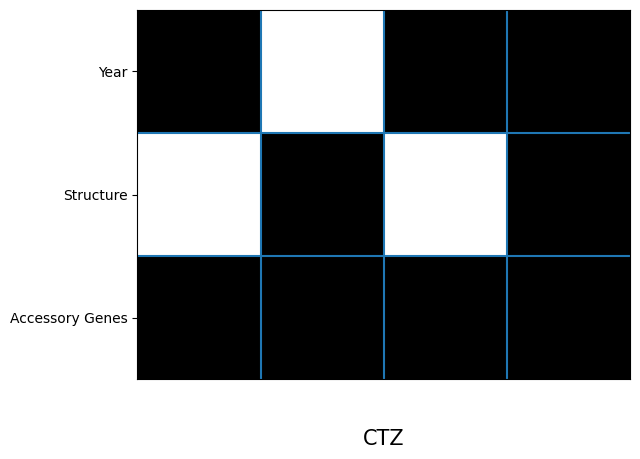

In [ ]:
# implementing function GYS_gridplot() for one drug "CTZ"
figure, subs = plt.subplots()
CTZ_gridplot = GYS_gridplot("CTZ",subs, label_show=True)

### **8) Create the final composite graph (Bargraphs + GYS gridplots)**

Below we finally create our Visualization graphs for the best metrics from all the models.

<ipython-input-11-4198cd7a9956>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot_axis.set_xticklabels(X_labels, fontsize = 15)
<ipython-input-13-7b624cc67cd1>:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Y_list.append(int(df["Y"][df["Drug"]==drug]))
<ipython-input-13-7b624cc67cd1>:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  S_list.append(int(df["S"][df["Drug"]==drug]))
<ipython-input-13-7b624cc67cd1>:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  G_list.append(int(df["G"][df["Drug"]==drug]))
<ipython-input-13-7b624cc67cd1>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases late

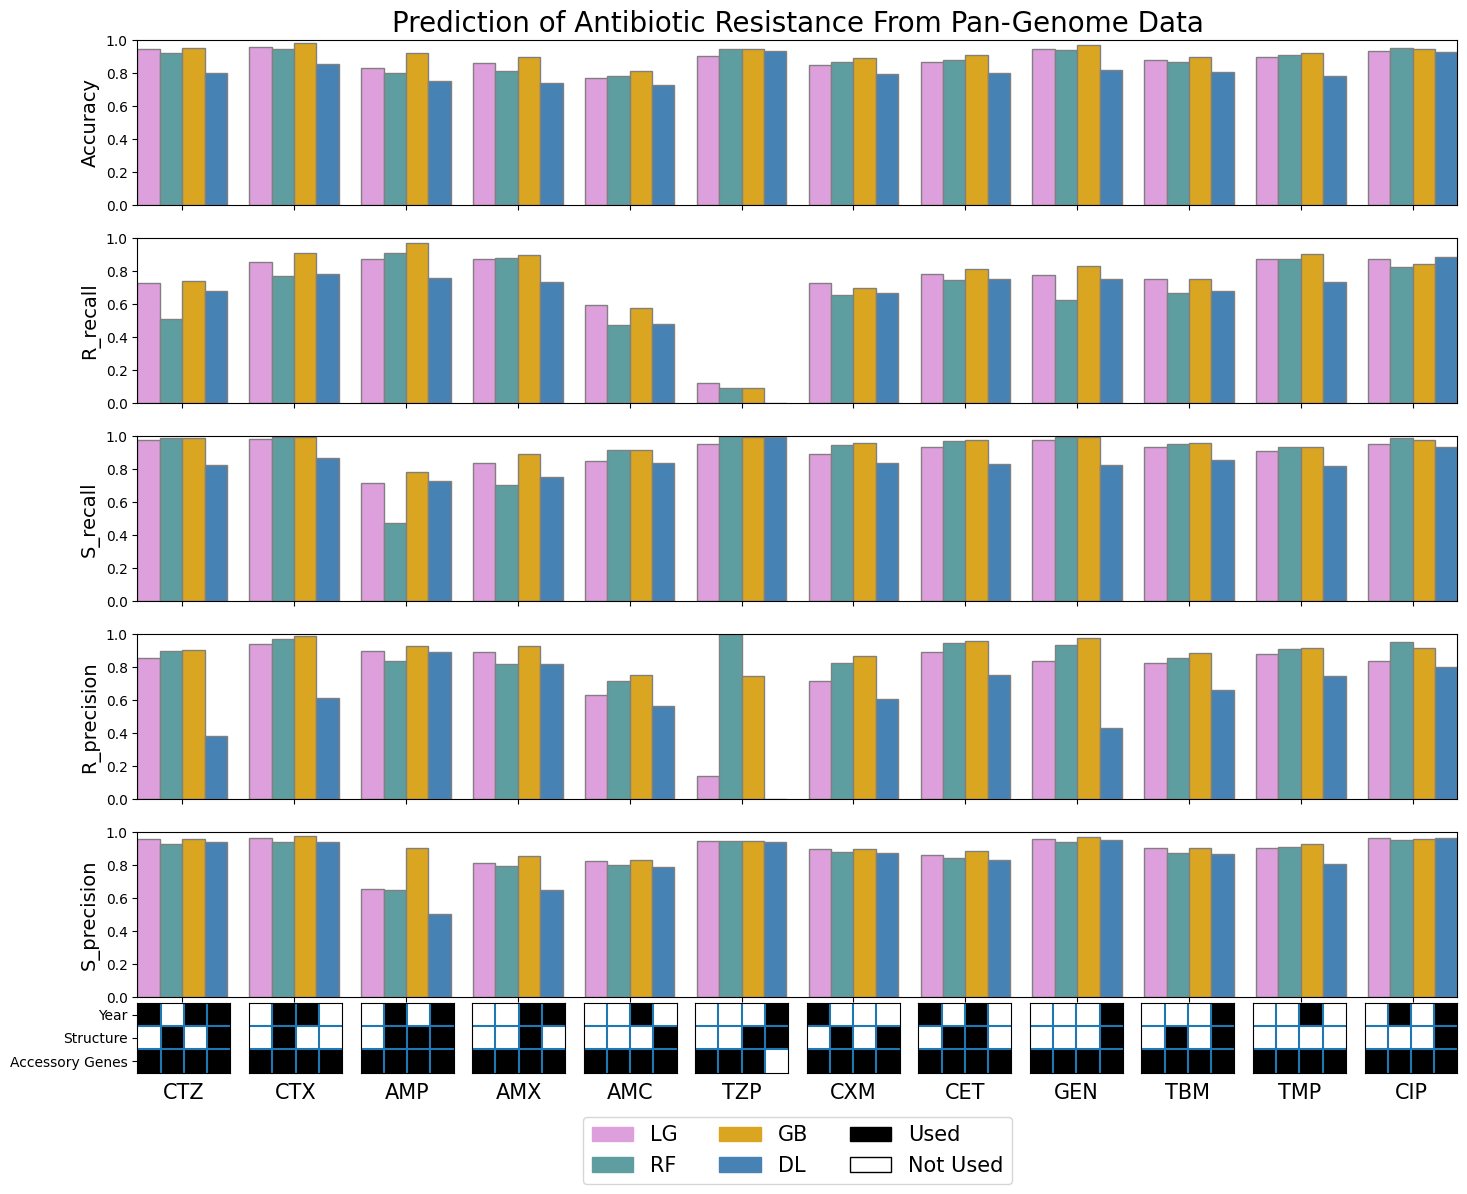

In [ ]:
# Code to create bargraphs
fig = plt.figure(figsize = (24,15), constrained_layout=False)

gs1 = fig.add_gridspec(nrows=6, ncols=12, left=0.05, right=0.6, wspace=0.07)
# Accuracy barcharts for all models
acc_axis = fig.add_subplot(gs1[0, :])
acc_axis.set_title('Prediction of Antibiotic Resistance From Pan-Genome Data', fontsize = 20)
acc_plot = barplot("Accuracy",acc_axis, label_show = False)

# R_recall_score barcharts for all models
R_metric_axis = fig.add_subplot(gs1[1, :])
R_metric_plot = barplot('R_recall',R_metric_axis, label_show = False)

# S_recall barcharts for all models
S_metric_axis = fig.add_subplot(gs1[2, :])
S_metric_plot = barplot('S_recall',S_metric_axis, label_show = False)

# R_precision barcharts for all models
R_metric_axis = fig.add_subplot(gs1[3, :])
R_metric_plot = barplot('R_precision',R_metric_axis, label_show = False)

# S_precision barcharts for all models
S_metric_axis = fig.add_subplot(gs1[4, :])
S_metric_plot = barplot('S_precision',S_metric_axis, label_show = False)

# GYS gridplot charts for each drug
gs2 = fig.add_gridspec(nrows=1, ncols=12, top=0.43,bottom=0,left=0.05, right=0.6, wspace=0.2)
i=0
while (i< len(drug_list)):
  for drug in drug_list:
    if i == 0:
      Drug_grid = fig.add_subplot(gs2[-1, i])
      drug_GYS = GYS_gridplot(drug, Drug_grid, label_show=True, title_pos=-0.5)
      i+=1
    else:
      Drug_grid = fig.add_subplot(gs2[-1, i])
      drug_GYS = GYS_gridplot(drug, Drug_grid, label_show=False, title_pos=-0.5)
      i+=1

legend_elements = [Patch(facecolor='plum', edgecolor='plum', label='LG'),
                   Patch(facecolor='cadetblue', edgecolor='cadetblue', label='RF'),
                   Patch(facecolor='goldenrod', edgecolor='goldenrod', label='GB'),
                   Patch(facecolor='steelblue', edgecolor='steelblue', label='DL'),
                   Patch(facecolor='black', edgecolor="black", label='Used'),
                   Patch(facecolor='white', edgecolor="black",label='Not Used')]

plt.legend(handles=legend_elements,loc = 'lower center', bbox_to_anchor=(-6.1, -1), prop ={'size': 15}, borderaxespad=-2, ncol = 3)

# saving plot as a jpg image (Make sure to change names if you plan to create more than one!)
plt.savefig('/content/drive/MyDrive/EColi_ML_Plots/Final_Metrics_Plot.jpg',dpi=400, bbox_inches="tight")


The results show that, over all, the extreme gradient-boosted tree model does very well, and has the highest accuracy and recall for many of the drugs. We also see that gene presence-absence data are most likely to be included in the best-scoring models, whereas year of isolation is least likely to be included. Finally, we notice big differences between drugs and between resistance and susceptibility. This may be explained by the fact that for some of the drugs, the number of resistant strains is low, which makes it hard for the models to “learn” to recognize them.